In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math

In [2]:
#FUNCTIONS TO CLEAN COLUMNS: HEIGHT, WEIGHT, SHOOTS, BIRTHDATE

In [3]:
def lpeso(df):
    df.height = df.height.apply(lambda x: x.split('-'))
    df.height = df.height.apply(lambda x: float(x[0]) * 30.48 + float(x[-1]) * 2.54)
    return df
def laltura(df):
    df.weight = df.weight.apply(lambda x: str(x)[:-2])
    df.weight = df.weight.apply(lambda x: 0 if x == 'n' else x)
    df.weight = df.weight.apply(lambda x: int(x))
    df.weight = df.weight.apply(lambda x: df.weight.mean() if x == 0 else x)
    df.weight = df.weight.apply(lambda x: x * 0.453592)
    return df
def lshoots(df):
    df.shoots = df.shoots.apply(lambda x: 1 if x == 'Right' else 0)
    return df
def lnascimento(df):
    df.birthDate = df.birthDate.apply(lambda x: str(x).split(' ')[-1])
    df.birthDate = df.birthDate.apply(lambda x: 0 if x == 'nan' else x)
    df.birthDate = df.birthDate.apply(lambda x: int(x))
    df = df.set_index(['birthDate'])
    df = df.drop(0)
    df = df.reset_index()
    return df


In [4]:
#IMPORT CSV FILES WITH PANDAS

In [5]:
df = pd.read_csv(r"C:\Users\gafte\Documents\datasets\players.csv")
df_salario = pd.read_csv(r"C:\Users\gafte\Documents\datasets\salaries_1985to2018.csv")

In [6]:
#CLEANING COLUMNS WITH FUNCTIONS

In [7]:
df = lnascimento(df)
df = lshoots(df)
df = laltura(df)
df = lpeso(df)
df = df.rename(columns={'_id': 'player_id'})

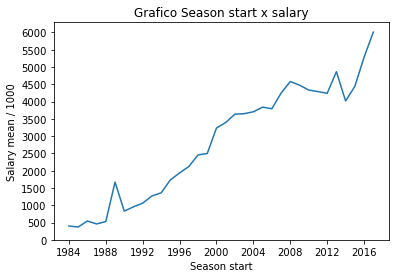

In [8]:
df_season = df_salario.groupby(['season_start']).mean().reset_index()
df_season.salary = df_season.salary.apply(lambda x: int(x/1000))

xticks = [df_season.season_start[i] for i in range(0, len(list(df_season.season_start)), 4)]
yticks = [500 * i for i in range(13)]

plt.plot(df_season.season_start, df_season.salary)
plt.title('Grafico Season start x salary')
plt.ylabel('Salary mean / 1000')
plt.yticks(yticks)
plt.xticks(xticks)
plt.xlabel('Season start')
plt.show()

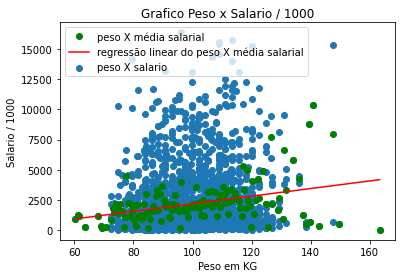

In [9]:

df_salario = df_salario.groupby(['player_id']).mean().reset_index()
df_salario.salary = df_salario.salary.apply(lambda x: int(x/1000))
df2 = pd.merge(df, df_salario)

salario = df2.groupby(['weight']).mean().reset_index()

salariow = np.array(salario.weight).reshape(-1, 1)
salarios = np.array(salario.salary).reshape(-1, 1)
line_fitter = LinearRegression()
line_fitter.fit(salariow, salarios)
salario_p = line_fitter.predict(salariow)

plt.scatter(df2.weight, df2.salary, label='peso X salario')
plt.plot(salario.weight, salario.salary, 'o', c='green', label='peso X média salarial')
plt.plot(salario.weight, salario_p, c='red', label='regressão linear do peso X média salarial')
plt.ylabel('Salario / 1000')
plt.xlabel('Peso em KG')
plt.title('Grafico Peso x Salario / 1000')
plt.legend(loc="upper left")
plt.show()

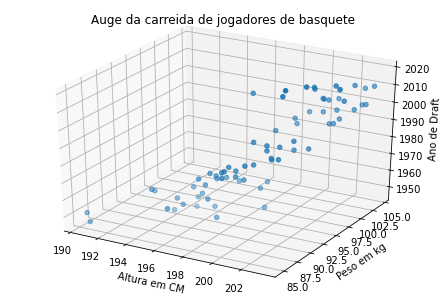

In [10]:
range = df.groupby(['draft_year']).mean()
range = range.reset_index()
range.draft_year.replace('[0-9][a-z][a-z]', np.NaN ,regex=True, inplace=True)
range = range.dropna()

range.draft_year = range.draft_year.apply(lambda x: int(x))


fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = range.height
sequence_containing_y_vals = range.weight
sequence_containing_z_vals = range.draft_year
ax.set_title('Auge da carreida de jogadores de basquete')
ax.set_ylabel('Peso em kg')
ax.set_xlabel('Altura em CM')
ax.set_zlabel('Ano de Draft')

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

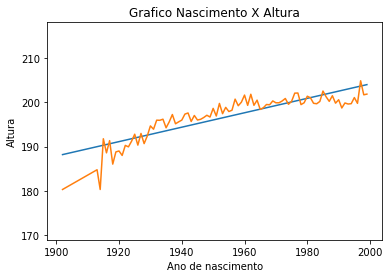

In [11]:
range_nascimento = df.groupby(['birthDate']).mean()
range_nascimento = range_nascimento.reset_index()

x = range_nascimento.birthDate.values.reshape(-1, 1)
y = range_nascimento.height.values.reshape(-1, 1)

regr = LinearRegression()
regr.fit(x, y)
predict = regr.predict(x)
plt.plot(x, predict)

low = min(range_nascimento.height)
high = max(range_nascimento.height)
plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.plot(range_nascimento.birthDate, range_nascimento.height)
plt.ylabel('Altura')
plt.xlabel('Ano de nascimento')
plt.title('Grafico Nascimento X Altura')
plt.show()